In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mob

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
population = np.array([100000,200000,150000])
Phi = cv19mob.rnd_flux(population=population,fraction=0.1)

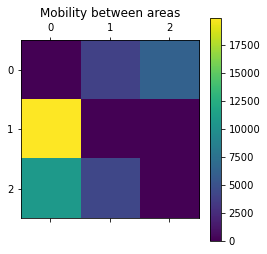

In [3]:
plt.matshow(Phi(0))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [5]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [6]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

Missing flux dynamics, using a random matrix instead


In [7]:
seir.solve()

In [8]:
seir.results_build()

In [9]:
seir.global_results_build()

In [10]:
import pandas as pd

In [10]:
seir.global_results

,t,S,E,E_d,I,I_d,R,R_d
0,0,422200,2800,280,2500,250,22500,0
1,1,421841,2617,331,2776,431,22764,168
2,2,421450,2497,370,2997,480,23053,245
3,3,421033,2424,401,3180,486,23362,286
4,4,420591,2385,427,3334,482,23688,312
...,...,...,...,...,...,...,...,...
495,495,195610,1,0,2,0,254385,0
496,496,195609,1,0,2,0,254386,0
497,497,195609,1,0,2,0,254386,0
498,498,195609,1,0,2,0,254386,0


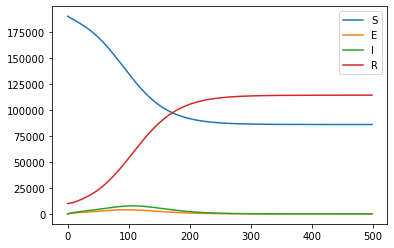

In [ ]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


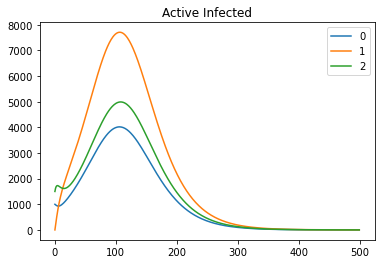

In [ ]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

## Output

In [10]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,node
0,0,93000,1000,100,1000,100,5000,0,0
1,1,93028,895,82,979,75,5093,-51,0
2,2,93035,822,83,960,65,5177,-77,0
3,3,93029,770,90,945,63,5255,-92,0
4,4,93001,734,97,934,63,5328,-101,0
...,...,...,...,...,...,...,...,...,...
1495,495,64515,0,0,0,0,85690,1333,2
1496,496,64515,0,0,0,0,85690,1333,2
1497,497,64515,0,0,0,0,85690,1333,2
1498,498,64515,0,0,0,0,85690,1333,2


In [11]:
seir.params

,t,beta,tE_I,tI_R,rR_S,node
0,0,0.20,5.0,10.0,0,0
1,1,0.20,5.0,10.0,0,0
2,2,0.20,5.0,10.0,0,0
3,3,0.20,5.0,10.0,0,0
4,4,0.20,5.0,10.0,0,0
...,...,...,...,...,...,...
1495,495,0.11,5.0,10.0,0,2
1496,496,0.11,5.0,10.0,0,2
1497,497,0.11,5.0,10.0,0,2
1498,498,0.11,5.0,10.0,0,2


In [20]:
np.shape(seir.S.sum(axis=0))

(500,)

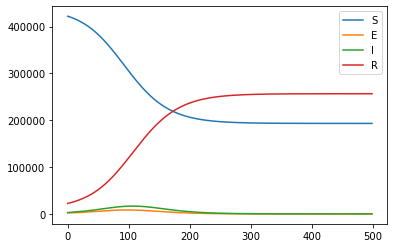

In [24]:
plt.plot(seir.t,seir.S.sum(axis=0),label='S')
plt.plot(seir.t,seir.E.sum(axis=0),label='E')
plt.plot(seir.t,seir.I.sum(axis=0),label='I')
plt.plot(seir.t,seir.R.sum(axis=0),label='R')
plt.legend(loc=0)
plt.show()

In [57]:
aux = {}
for i in range(seir.nodes):
    aux[str(i)] = seir.results.loc[seir.results['node']==i].to_dict('list')

In [59]:
json.dumps(aux)

'{"0": {"t": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

# With configuration file

In [19]:
cfg = 'cfg/SEIRMETA.toml'

In [20]:
seir2 = SEIRMETA(config=cfg)

Missing flux dynamics, using a random matrix instead


In [21]:
seir2.solve()

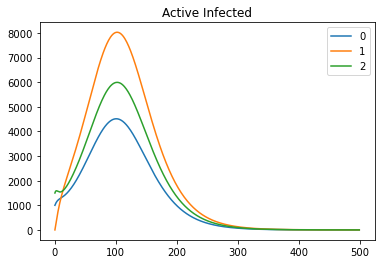

In [17]:
plt.plot(seir2.t,seir2.I[0],label='0')
plt.plot(seir2.t,seir2.I[1],label='1')
plt.plot(seir2.t,seir2.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

In [15]:
seir2.results

,t,S,E,E_d,I,I_d,R,R_d,node
0,0,93000,1000,100,1000,100,5000,0,0
1,1,92865,972,138,1060,133,5101,46,0
2,2,92732,952,154,1109,141,5205,64,0
3,3,92603,939,163,1149,141,5309,71,0
4,4,92473,930,168,1181,139,5414,73,0
...,...,...,...,...,...,...,...,...,...
1495,495,60971,0,0,0,0,88948,-1238,2
1496,496,60972,0,0,0,0,88950,-1238,2
1497,497,60973,0,0,0,0,88951,-1237,2
1498,498,60973,0,0,0,0,88952,-1236,2


In [16]:
seir2.params

,t,beta,tE_I,tI_R,rR_S,node
0,0,0.200,5.0,10.0,0,0
1,1,0.200,5.0,10.0,0,0
2,2,0.200,5.0,10.0,0,0
3,3,0.200,5.0,10.0,0,0
4,4,0.200,5.0,10.0,0,0
...,...,...,...,...,...,...
1495,495,0.125,5.0,10.0,0,2
1496,496,0.125,5.0,10.0,0,2
1497,497,0.125,5.0,10.0,0,2
1498,498,0.125,5.0,10.0,0,2


In [40]:
seir2.nodes

3

In [39]:
seir2.results

,t,S,E,E_d,I,I_d,R,R_d,node
0,0,93000,999,100,1000,100,5000,0,0
1,1,93055,886,70,968,63,5092,-60,0
2,2,93079,806,70,941,49,5174,-91,0
3,3,93081,752,77,919,47,5248,-109,0
4,4,93064,714,86,905,49,5318,-120,0
...,...,...,...,...,...,...,...,...,...
1495,495,60515,0,0,0,0,89551,1735,2
1496,496,60514,0,0,0,0,89550,1737,2
1497,497,60512,0,0,0,0,89547,1735,2
1498,498,60511,0,0,0,0,89546,1735,2


In [44]:
aux = {}
for i in range(seir2.nodes):
    aux[str(i)] = seir2.results.loc[seir2.results['node']==i].to_dict()

In [46]:
import json

In [47]:
json.dumps(aux)

'{"0": {"t": {"0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10, "11": 11, "12": 12, "13": 13, "14": 14, "15": 15, "16": 16, "17": 17, "18": 18, "19": 19, "20": 20, "21": 21, "22": 22, "23": 23, "24": 24, "25": 25, "26": 26, "27": 27, "28": 28, "29": 29, "30": 30, "31": 31, "32": 32, "33": 33, "34": 34, "35": 35, "36": 36, "37": 37, "38": 38, "39": 39, "40": 40, "41": 41, "42": 42, "43": 43, "44": 44, "45": 45, "46": 46, "47": 47, "48": 48, "49": 49, "50": 50, "51": 51, "52": 52, "53": 53, "54": 54, "55": 55, "56": 56, "57": 57, "58": 58, "59": 59, "60": 60, "61": 61, "62": 62, "63": 63, "64": 64, "65": 65, "66": 66, "67": 67, "68": 68, "69": 69, "70": 70, "71": 71, "72": 72, "73": 73, "74": 74, "75": 75, "76": 76, "77": 77, "78": 78, "79": 79, "80": 80, "81": 81, "82": 82, "83": 83, "84": 84, "85": 85, "86": 86, "87": 87, "88": 88, "89": 89, "90": 90, "91": 91, "92": 92, "93": 93, "94": 94, "95": 95, "96": 96, "97": 97, "98": 98, "99": 99, "100":